In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('data.csv') 
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [3]:
#Encoding
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


In [5]:


## Checking for Missing Values

train_df.isnull().sum()

## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:

## Segregating the target variable from the features

X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape



((335, 5), (335,))

In [7]:


## Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [8]:
## Model Training

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, random_state=5)

In [9]:

## Cross Validation

from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

In [10]:
!pip install mlflow

In [11]:
import mlflow

In [12]:
mlflow.set_experiment("Loan Status")

<Experiment: artifact_location='file:///Users/suraaj/Desktop/MLFLOW/mlruns/320424235992953562', creation_time=1677772894519, experiment_id='320424235992953562', last_update_time=1677772894519, lifecycle_stage='active', name='Loan Status', tags={}>

In [23]:
with mlflow.start_run():
    #training the model
    model = RandomForestClassifier(max_depth=4, random_state=5)
    model.fit(X_train, y_train)
    
    #capture the evaluation metrics
    pred_val = model.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)
    
    #capture the training metrics
    pred_train = model.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)
    
    
    mlflow.set_tag('mlflow.runName','Random Forest First Run')
    mlflow.log_param("max_depth", 4)
    mlflow.log_metric("Val Acc", val_acc)
    mlflow.log_metric("Train Acc", train_acc)
    
    mlflow.sklearn.log_model(model, "Model")
    
    
    

/Users/suraaj/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [24]:
!mlflow ui

[2023-03-02 21:43:09 +0530] [64833] [INFO] Starting gunicorn 20.1.0
[2023-03-02 21:43:09 +0530] [64833] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2023-03-02 21:43:09 +0530] [64833] [ERROR] Retrying in 1 second.
[2023-03-02 21:43:10 +0530] [64833] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2023-03-02 21:43:10 +0530] [64833] [ERROR] Retrying in 1 second.
[2023-03-02 21:43:11 +0530] [64833] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2023-03-02 21:43:11 +0530] [64833] [ERROR] Retrying in 1 second.
[2023-03-02 21:43:12 +0530] [64833] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2023-03-02 21:43:12 +0530] [64833] [ERROR] Retrying in 1 second.
[2023-03-02 21:43:13 +0530] [64833] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2023-03-02 21:43:13 +0530] [64833] [ERROR] Retrying in 1 second.
[2023-03-02 21:43:14 +0530] [64833] [ERROR] Can't connect to ('127.0.0.1', 5000)
Running the mlflow server failed. Please see the logs above for details.


In [13]:
def model_func(n_est, max_dep, i):
    with mlflow.start_run():
        model = RandomForestClassifier(max_depth=max_dep, n_estimators=n_est, random_state=5)
        model.fit(X_train, y_train)

        #capture the evaluation metrics
        pred_val = model.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)

        #capture the training metrics
        pred_train = model.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)

        run_name=f"Hyperparameter tuning version_{i}"
        mlflow.set_tag('mlflow.runName', run_name)
        mlflow.log_param("max_depth", max_dep)
        mlflow.log_param("n_estimator", n_est)
        mlflow.log_metric("Val Acc", val_acc)
        mlflow.log_metric("Train Acc", train_acc)

        mlflow.sklearn.log_model(model, "Model")

    

In [14]:
model_func(10,2,1)
model_func(20,2,2)
model_func(30,2,3)
model_func(40,2,4)
model_func(50,2,5)
model_func(60,2,6)
model_func(10,4,7)
model_func(20,4,8)
model_func(30,4,9)
model_func(20,8,10)
model_func(40,8,11)
model_func(60,8,12)



/Users/suraaj/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
1. #Change the data
2. #KNN classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def model_func_KNN():
    with mlflow.start_run():
        model = KNeighborsClassifier(n_neighbors=5)
        model.fit(X_train, y_train)

        #capture the evaluation metrics
        pred_val = model.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)

        #capture the training metrics
        pred_train = model.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)

        mlflow.set_tag('mlflow.runName', 'KNN Model')
        mlflow.log_param("neighbors", 5)
        mlflow.log_metric("Val Acc", val_acc)
        mlflow.log_metric("Train Acc", train_acc)
        
        cm = ConfusionMatrixDisplay.from_predictions(y_val, pred_val)
        mlflow.log_artifact("Confusion Matrix.jpg") 

        mlflow.sklearn.log_model(model, "Model")


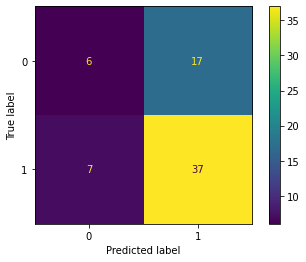

In [17]:
model_func_KNN()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def model_func_KNN():
    with mlflow.start_run():
        model = KNeighborsClassifier(n_neighbors=5)
        model.fit(X_train, y_train)

        #capture the evaluation metrics
        pred_val = model.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)

        #capture the training metrics
        pred_train = model.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)

        mlflow.set_tag('mlflow.runName', 'KNN Model')
        mlflow.log_param("neighbors", 5)
        mlflow.log_metric("Val Acc", val_acc)
        mlflow.log_metric("Train Acc", train_acc)
        
        cm = ConfusionMatrixDisplay.from_predictions(y_val, pred_val)
        mlflow.log_artifact("Confusion Matrix.jpg")
        
        df=pd.read_csv('data_new.csv')
        
        check=df.to_csv('new_data.csv')
        mlflow.log_artifact('new_data.csv')

        mlflow.sklearn.log_model(model, "Model")


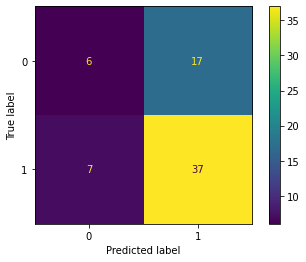

In [23]:
model_func_KNN()

In [ ]:
#EC2 instance --- VM
#Jupyter notebook
#S3 location

In [ ]:
#sagemaker

In [ ]:
#S3 folder